<a href="https://colab.research.google.com/github/pepamengual/jupyter_bojos/blob/master/jupyter_bojos_hla_binding_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First, we need to import some general dependencies

In [0]:
import numpy as np

In [0]:
import random

In [0]:
import matplotlib.pyplot as plt

### Now, we load the files we will use to develop the predictor

In [59]:
from google.colab import files
uploaded = files.upload()

Saving data_negative.txt to data_negative (1).txt
Saving data_positive_high.txt to data_positive_high (1).txt


### We need a function to convert the files into peptide lists

In [0]:
def read_files(input_file):
  peptide_list = []
  with open(input_file, "r") as f:
    for line in f:
      peptide = line.rstrip()
      peptide_list.append(peptide)
  return peptide_list

In [473]:
positive_high_file = "data_positive_high.txt"
negative_file = "data_negative.txt"

positive_high_peptides = read_files(positive_high_file)
negative_peptides = read_files(negative_file)

data_in_numbers = "There are {} Positive-High and {} Negative peptides".format(len(positive_high_peptides), len(negative_peptides))
print(data_in_numbers)

There are 3595 Positive-High and 7265 Negative peptides


### We now define a percentage of training, and a function that returns how many peptides we need to use according to the percentage

In [0]:
percentage = 0.90

def compute_number_training(input_list, percentage):
  training_lenght = int(len(input_list) * percentage)
  return training_lenght

In [0]:
training_data_lenght = compute_number_training(positive_high_peptides, percentage)
negative_data_lenght = compute_number_training(negative_peptides, percentage)

### Now we shuffle the list of positive-high peptides, to make them appear in random order in the list

In [0]:
random.shuffle(positive_high_peptides)

### At this point, we select the first n random peptides to be used during the training, and the rest is going to the testing

In [477]:
training_data_positive_high = positive_high_peptides[:training_data_lenght]
testing_data_positive_high = positive_high_peptides[training_data_lenght:]

print(training_data_positive_high)

['FVANFSMEL', 'VLAGLLGNV', 'YTAFTIPSI', 'LMAEDLANV', 'YLDAYNMMI', 'LVEALYLVC', 'KQFCLSILL', 'YLGPRVCWL', 'SLFNTIAVL', 'ALSEFIKFA', 'RMDLGVPLL', 'VLFTFVLLL', 'FLWLLWPVT', 'KLDDVVFPL', 'AAAATCALV', 'FIYSIMETI', 'FIADIGIGV', 'CMSANEAAI', 'WMLGTGVYL', 'RLLYPDYQI', 'RLLQETELV', 'FMTATPPGA', 'YLLGDSDSV', 'IMAVGMVSI', 'YLSAKITTL', 'MMNERDVSV', 'ALFSGVSWV', 'FLWGPRALV', 'VVLGVVFGI', 'VLAEAMSQV', 'FVIGGMTGV', 'ALTVVWLLV', 'SLMAFTASV', 'KLQDCTMLV', 'YIVAYQATV', 'CLMTYSHHA', 'YLLALRYLA', 'RLYDYFTRV', 'MVNHSTYYV', 'YLAKLTALV', 'YLVAYQATV', 'SLQEEIAFL', 'LMWLSYFVA', 'AMAGSIDLL', 'GLFGKGSLV', 'GLEAYIQGI', 'KLIEPVNAI', 'LLGTFTWTL', 'HMYFTFFDV', 'YLFNAIETM', 'KVIQYLAYV', 'YILYIVFCI', 'GLFDFVNFV', 'KLADMSIYC', 'FLLSLGIHL', 'SLSMTCIAV', 'YQLGDYFFV', 'ITDWLNFTL', 'FVFSTSFYL', 'LMDALKLSI', 'FMYSDFHFI', 'MMHASTSPF', 'LVISGLFPV', 'ILMDTICGT', 'LITNYLPSV', 'SLGQYIYET', 'YLMAWKQVL', 'LMVDSFDPV', 'MLVCGDDLV', 'KMHFYLPGA', 'YQCGHYTHI', 'NLLLWPLYV', 'VLIQRNPQL', 'ILDIAGFEI', 'YQSFLFWFL', 'YLVAYQATV', 'VLSIMAFIL'

### We create an "empty" dictionary with the following structure:
 - ### key1: position of the peptide
 - ### key2: amino acid type
 - ### value: 1 value

In [0]:
valid_amino_acids = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]
def create_matrix_of_1(valid_amino_acids):
  empty_dictionary = {}
  for i in range(9):
    for amino_acid in valid_amino_acids:
      empty_dictionary.setdefault(i, {}).setdefault(amino_acid, 1)
  return empty_dictionary

In [0]:
number_seen_positive_high_training = create_matrix_of_1(valid_amino_acids)
number_seen_negative = create_matrix_of_1(valid_amino_acids)

### At this point, we access to the "empty" dictionary, adding the counts of each amino acid by each particular position of the positive-high list and negative

In [0]:
def count_ocurrences_by_position(empty_dictionary, peptide_list):
  for peptide in peptide_list:
    for position, amino_acid in enumerate(peptide):
      empty_dictionary[position][amino_acid] += 1
  return empty_dictionary

In [481]:
number_seen_positive_high_training = count_ocurrences_by_position(number_seen_positive_high_training, training_data_positive_high)
number_seen_negative = count_ocurrences_by_position(number_seen_negative, negative_peptides)

print("Positive-High -->", number_seen_positive_high_training)
print("Negative -->", number_seen_negative)

Positive-High --> {0: {'A': 236, 'C': 28, 'D': 8, 'E': 18, 'F': 489, 'G': 194, 'H': 51, 'I': 227, 'K': 264, 'L': 320, 'M': 107, 'N': 65, 'P': 4, 'Q': 58, 'R': 149, 'S': 251, 'T': 115, 'V': 182, 'W': 75, 'Y': 414}, 1: {'A': 55, 'C': 3, 'D': 1, 'E': 4, 'F': 8, 'G': 3, 'H': 2, 'I': 320, 'K': 2, 'L': 1980, 'M': 442, 'N': 1, 'P': 2, 'Q': 102, 'R': 2, 'S': 8, 'T': 119, 'V': 196, 'W': 1, 'Y': 4}, 2: {'A': 319, 'C': 42, 'D': 200, 'E': 21, 'F': 267, 'G': 97, 'H': 48, 'I': 269, 'K': 38, 'L': 489, 'M': 239, 'N': 111, 'P': 87, 'Q': 81, 'R': 16, 'S': 250, 'T': 93, 'V': 156, 'W': 129, 'Y': 303}, 3: {'A': 313, 'C': 75, 'D': 384, 'E': 283, 'F': 108, 'G': 372, 'H': 57, 'I': 80, 'K': 129, 'L': 171, 'M': 48, 'N': 173, 'P': 197, 'Q': 94, 'R': 92, 'S': 257, 'T': 181, 'V': 91, 'W': 56, 'Y': 94}, 4: {'A': 215, 'C': 70, 'D': 151, 'E': 111, 'F': 269, 'G': 241, 'H': 86, 'I': 242, 'K': 89, 'L': 357, 'M': 63, 'N': 106, 'P': 69, 'Q': 75, 'R': 101, 'S': 150, 'T': 201, 'V': 293, 'W': 99, 'Y': 267}, 5: {'A': 133, 'C'

### Now, we compute the frecuency of finding each amino acid by each position. Actually, we just divide the counts we observed by the amount of peptides we are using for positive-high and negative

In [0]:
def compute_frequency(count_dictionary, training_lenght):
  frequency_dictionary = {}
  for position, amino_acid_dict in count_dictionary.items():
    for amino_acid, number_observations in amino_acid_dict.items():
      frequency = number_observations / training_lenght
      frequency_dictionary.setdefault(position, {}).setdefault(amino_acid, frequency)
  return frequency_dictionary

In [483]:
frequency_seen_positive_high_training = compute_frequency(number_seen_positive_high_training, training_data_lenght)
frequency_seen_negative = compute_frequency(number_seen_negative, negative_data_lenght)

print("Positive-High -->", frequency_seen_positive_high_training)
print("Negative -->", frequency_seen_negative)

Positive-High --> {0: {'A': 0.07295208655332303, 'C': 0.00865533230293663, 'D': 0.002472952086553323, 'E': 0.0055641421947449764, 'F': 0.15115919629057187, 'G': 0.059969088098918086, 'H': 0.015765069551777436, 'I': 0.07017001545595054, 'K': 0.08160741885625966, 'L': 0.09891808346213292, 'M': 0.033075734157650694, 'N': 0.02009273570324575, 'P': 0.0012364760432766616, 'Q': 0.01792890262751159, 'R': 0.04605873261205564, 'S': 0.0775888717156105, 'T': 0.03554868624420402, 'V': 0.0562596599690881, 'W': 0.023183925811437404, 'Y': 0.12797527047913446}, 1: {'A': 0.017001545595054096, 'C': 0.0009273570324574962, 'D': 0.0003091190108191654, 'E': 0.0012364760432766616, 'F': 0.002472952086553323, 'G': 0.0009273570324574962, 'H': 0.0006182380216383308, 'I': 0.09891808346213292, 'K': 0.0006182380216383308, 'L': 0.6120556414219475, 'M': 0.1366306027820711, 'N': 0.0003091190108191654, 'P': 0.0006182380216383308, 'Q': 0.03153013910355487, 'R': 0.0006182380216383308, 'S': 0.002472952086553323, 'T': 0.036

### We are almost finishing our predictor!
### We need to compute now, the log(2) of the fraction between the positive and negative frequencies

In [0]:
def make_motifs(frequency_seen_positive_high_training, frequency_seen_negative, frequency_seen_random):
  motif = {}
  for position, amino_acid_dict in frequency_seen_positive_high_training.items():
    for amino_acid, frequency_positive in amino_acid_dict.items():
      frequency_negative = frequency_seen_negative[position][amino_acid]      
      log_2_obs_exp = np.log2(frequency_positive/frequency_negative)
      motif.setdefault(position, {}).setdefault(amino_acid, log_2_obs_exp)

  return motif

In [0]:
motif = make_motifs(frequency_seen_positive_high_training, frequency_seen_negative, frequency_seen_random)

### Now, we define a function to puntuate peptides, according to our predictor (motif)

In [0]:
def score_peptides(peptide_list, motif_type):
  predictions = []
  for peptide in peptide_list:
    score = 0
    for position, amino_acid in enumerate(peptide):
      score += motif_type[position][amino_acid] * -1
    predictions.append(score)
  return predictions

### We evaluate now the testing positive-high peptides
### Then, we shuffle randomly the negative ones and select the same percentage than the negative ones to evaluate our performance

In [0]:
testing_data_values = score_peptides(testing_data_positive_high, motif)

random.shuffle(negative_peptides)
random_negative_percentile = negative_peptides[negative_data_testing:]

negative_data_values = score_peptides(random_negative_percentile, motif)

### Now, we can plot the distribution of the same percentage of testing positive-high peptides, and negative ones!

360


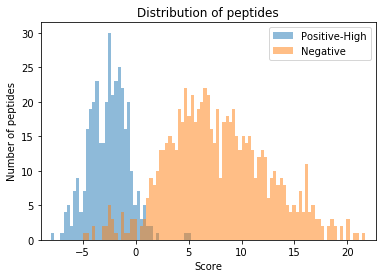

In [488]:
min_values = min(testing_data_values + negative_data_values) - 1
max_values = max(testing_data_values + negative_data_values) + 1

bins = np.arange(-50, 50, 0.3)
plt.xlim([min_values, max_values])
print(len(testing_data_values))
plt.hist(testing_data_values, bins=bins, alpha=0.5, label="Positive-High")
plt.hist(negative_data_values, bins=bins, alpha=0.5, label="Negative")
plt.xlabel("Score")
plt.ylabel("Number of peptides")
plt.title("Distribution of peptides")
plt.legend()
plt.show()